In [1]:
# Import the random module.
import random

In [2]:
random.randint(-90, 90)

46

In [3]:
random.random()

0.8968441671194237

In [4]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1
    
latitudes

[33.7598100470159,
 82.8283892928515,
 39.601806183867765,
 38.9384155334934,
 -54.39094891892779,
 78.94416067132653,
 5.964735013830564,
 -46.94734923538363,
 -39.80062412660361,
 53.57046254842455]

In [5]:
random.randrange(-90, 90, step=1)

73

In [6]:
random.randrange(-90, 90, step=3)

-6

In [7]:
# Import the NumPy module.
import numpy as np

In [8]:
np.random.uniform(-90.000, 90.000)

-16.119514431962074

In [9]:
np.random.uniform(-90.000, 90.000, size=50)

array([ -0.59406997,   1.19829407,  58.08826067,  83.37255857,
        48.66888292, -69.32974473,  54.09834224,  84.01487652,
       -70.15662014, -54.17209768, -12.33472863, -74.18656741,
        56.73443509, -69.8339141 ,  50.52883258,  60.52962939,
       -78.76749369,  12.28424479, -12.32189524,   4.00778689,
       -43.43347889,  18.25950784,  51.76564538, -81.72071077,
        25.25988181,  60.23832407, -43.45698124, -56.81123622,
       -73.17693162,  41.09824606, -19.45431237,  -1.23495543,
       -70.77931465, -56.01593136,  34.33499012, -62.10886041,
       -75.98168228,  32.04072488, -81.07449845, -62.81994747,
       -41.72807762,  15.57799441,  19.11896879,  58.03632117,
        46.9238013 , -23.99505777,  56.69716012, -11.43418818,
        26.17507673,  27.94456237])

In [10]:
# Import timeit.
import timeit

In [11]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

34.1 µs ± 770 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

4.3 ms ± 644 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [19]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=93878aa0148fc41ed51b4907a22a3127


In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [22]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | vestmannaeyjar
Processing Record 5 of Set 1 | kannur
Processing Record 6 of Set 1 | husavik
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | darab
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | luwuk
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | geraldton
Processing Record 14 of Set 1 | price
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | los llanos de aridane
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | egvekinot
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | pitimbu
Processing Record 22 of Set 1 | georgetown
Processing Record 23 of Set 1 | khatanga
Processing Record 2

Processing Record 40 of Set 4 | korla
Processing Record 41 of Set 4 | nikki
Processing Record 42 of Set 4 | savyntsi
Processing Record 43 of Set 4 | cabo san lucas
Processing Record 44 of Set 4 | bukama
Processing Record 45 of Set 4 | the pas
Processing Record 46 of Set 4 | guanay
Processing Record 47 of Set 4 | ostrovnoy
Processing Record 48 of Set 4 | aklavik
Processing Record 49 of Set 4 | saint-francois
Processing Record 50 of Set 4 | asau
Processing Record 1 of Set 5 | tutoia
Processing Record 2 of Set 5 | luderitz
Processing Record 3 of Set 5 | bad freienwalde
Processing Record 4 of Set 5 | tautira
Processing Record 5 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 5 | severo-kurilsk
Processing Record 7 of Set 5 | pacific grove
Processing Record 8 of Set 5 | nome
Processing Record 9 of Set 5 | chara
Processing Record 10 of Set 5 | dunnville
Processing Record 11 of Set 5 | ahipara
Processing Record 12 of Set 5 | vreed en hoop
City not found. Skipping...
P

Processing Record 32 of Set 8 | kuche
City not found. Skipping...
Processing Record 33 of Set 8 | puri
Processing Record 34 of Set 8 | road town
Processing Record 35 of Set 8 | grindavik
Processing Record 36 of Set 8 | lorengau
Processing Record 37 of Set 8 | barawe
City not found. Skipping...
Processing Record 38 of Set 8 | vila franca do campo
Processing Record 39 of Set 8 | tadepallegudem
Processing Record 40 of Set 8 | auki
Processing Record 41 of Set 8 | san francisco
Processing Record 42 of Set 8 | wahpeton
Processing Record 43 of Set 8 | menongue
Processing Record 44 of Set 8 | dongsheng
Processing Record 45 of Set 8 | uyuni
Processing Record 46 of Set 8 | jonkoping
Processing Record 47 of Set 8 | verkhnyaya inta
Processing Record 48 of Set 8 | dahra
Processing Record 49 of Set 8 | wiarton
Processing Record 50 of Set 8 | isangel
Processing Record 1 of Set 9 | ambulu
Processing Record 2 of Set 9 | vao
Processing Record 3 of Set 9 | west bay
Processing Record 4 of Set 9 | borba
Pr

Processing Record 18 of Set 12 | andevoranto
City not found. Skipping...
Processing Record 19 of Set 12 | mugur-aksy
Processing Record 20 of Set 12 | ixtapa
Processing Record 21 of Set 12 | chokwe
Processing Record 22 of Set 12 | progreso
Processing Record 23 of Set 12 | oksfjord
Processing Record 24 of Set 12 | sistranda
Processing Record 25 of Set 12 | ornskoldsvik
Processing Record 26 of Set 12 | katsuura
Processing Record 27 of Set 12 | ostersund
Processing Record 28 of Set 12 | khasan
Processing Record 29 of Set 12 | humaita
Processing Record 30 of Set 12 | tiksi
Processing Record 31 of Set 12 | ust-uda
Processing Record 32 of Set 12 | garut
Processing Record 33 of Set 12 | el balyana
City not found. Skipping...
Processing Record 34 of Set 12 | hovd
Processing Record 35 of Set 12 | mercedes
Processing Record 36 of Set 12 | tirano
Processing Record 37 of Set 12 | buchanan
Processing Record 38 of Set 12 | karratha
Processing Record 39 of Set 12 | soure
Processing Record 40 of Set 12

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,69.82,84,100,22.79,PF,2020-08-20 03:23:03
1,Ribeira Grande,38.52,-28.70,69.75,69,58,16.89,PT,2020-08-20 03:23:57
2,Busselton,-33.65,115.33,55.99,85,60,8.14,AU,2020-08-20 03:23:57
3,Vestmannaeyjar,63.44,-20.27,48.63,81,100,13.00,IS,2020-08-20 03:23:58
4,Kannur,11.87,75.36,77.00,100,40,3.51,IN,2020-08-20 03:23:59
5,Husavik,66.04,-17.34,35.60,93,0,3.36,IS,2020-08-20 03:23:59
6,Mataura,-46.19,168.86,57.00,79,97,5.01,NZ,2020-08-20 03:23:59
7,Darab,28.75,54.54,88.29,31,70,1.52,IR,2020-08-20 03:23:59
8,Albany,42.60,-73.97,64.00,65,4,6.49,US,2020-08-20 03:23:05
9,Luwuk,-0.95,122.79,84.06,58,45,6.93,ID,2020-08-20 03:24:00


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [25]:
sorted_city_data_df = city_data_df[new_column_order]
sorted_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-08-20 03:23:03,-23.12,-134.97,69.82,84,100,22.79
1,Ribeira Grande,PT,2020-08-20 03:23:57,38.52,-28.70,69.75,69,58,16.89
2,Busselton,AU,2020-08-20 03:23:57,-33.65,115.33,55.99,85,60,8.14
3,Vestmannaeyjar,IS,2020-08-20 03:23:58,63.44,-20.27,48.63,81,100,13.00
4,Kannur,IN,2020-08-20 03:23:59,11.87,75.36,77.00,100,40,3.51


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
sorted_city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1597894056.0708964

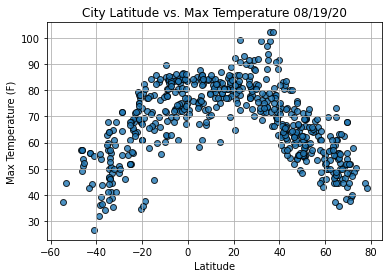

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

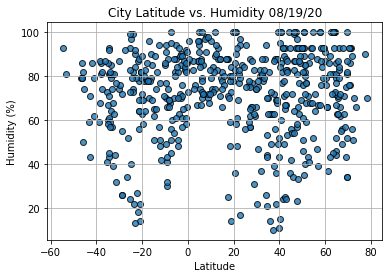

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

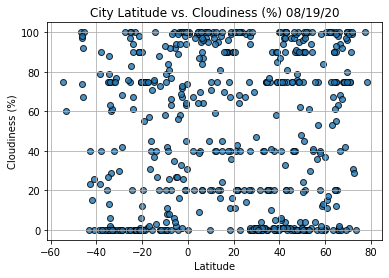

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

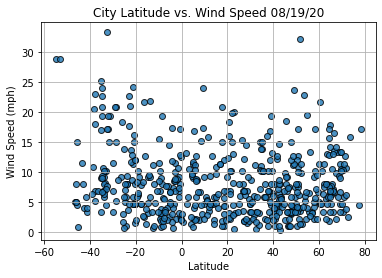

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()